In [153]:
import pandas as pd
data = pd.read_csv('crypto.txt')

In [154]:
data = data.drop('Unnamed: 0', axis = 1)

In [183]:
cap = data[['id','market_cap_usd']]

In [156]:
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
data = data[data['market_cap_usd'] > 0]

In [159]:
data.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [160]:
data['perc'] = (data.market_cap_usd/data.market_cap_usd.sum())*100

In [161]:
top10_id = data.id[:10]
top10_market_cap = data.market_cap_usd[:10]
top10_perc = data.perc[:10]

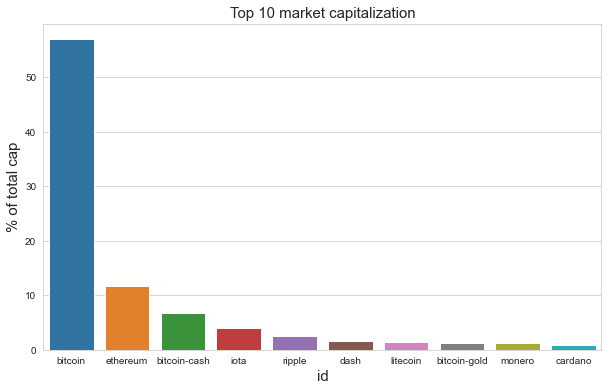

In [162]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
a.set_xticklabels(top10_id,rotation = 90)
a.tick_params(labelsize=20)
a = sns.barplot(data = data, x = top10_id, y = top10_perc, ax = ax)
a.set_title('Top 10 market capitalization', fontsize = 15)
a.set_ylabel('% of total cap', fontsize = 15)
a.set_xlabel('id', fontsize = 15)
plt.show()

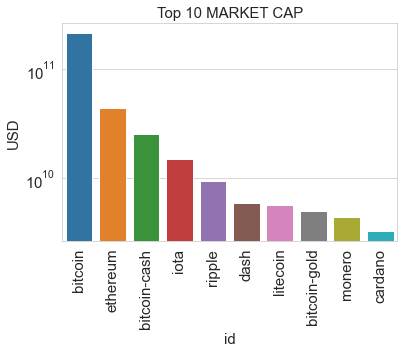

In [163]:
sns.set_style('whitegrid')
b = sns.barplot(data = data, x= top10_id, y = top10_market_cap, )
b.set_xticklabels(top10_id, rotation = 90)
b.set(yscale = 'log')
b.set_xlabel('id', fontsize = 15)
b.set_ylabel('USD', fontsize = 15)
b.tick_params(labelsize=15)
b.set_title('Top 10 MARKET CAP', fontsize = 15)
plt.show()

In [164]:
data.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply,perc
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07,56.918669
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07,11.629410
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07,6.758088
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09,3.941238
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10,2.502063


In [165]:
volatility = data[['percent_change_24h','percent_change_7d','id']]

In [166]:
volatility.count()

percent_change_24h    1006
percent_change_7d     1008
id                    1031
dtype: int64

In [167]:
volatility = volatility.set_index('id').dropna()

In [168]:
volatility.count()

percent_change_24h    990
percent_change_7d     990
dtype: int64

In [171]:
volatility = volatility.sort_values('percent_change_24h')

In [172]:
volatility.head()

,percent_change_24h,percent_change_7d
id,,
credence-coin,-94.22,-95.31
petrodollar,-76.55,542.96
bankcoin,-68.56,50.14
shadow-token,-61.40,-59.05
kibicoin,-57.51,-15.32


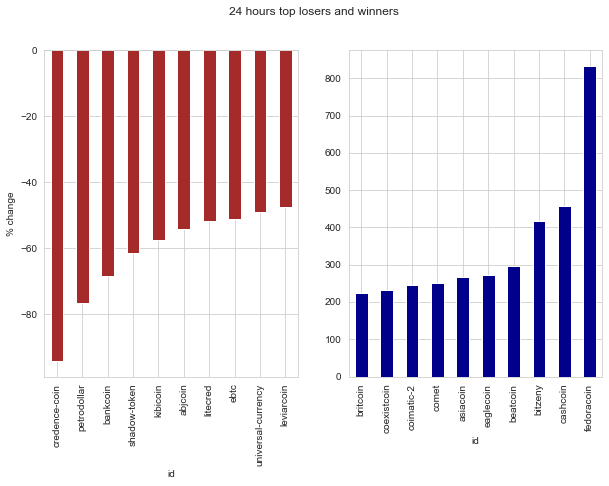

In [175]:
def top10_subplot(volatility_series, title):    
    fig, axes = plt.subplots(1,2, figsize=(10, 6))    
    ax = volatility_series[:10].plot.bar(color="brown", ax=axes[0])    
    fig.suptitle(title)    
    ax.set_ylabel('% change')    
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    return fig, ax

TITLE = "24 hours top losers and winners"

fig, ax = top10_subplot(volatility.percent_change_24h, TITLE)

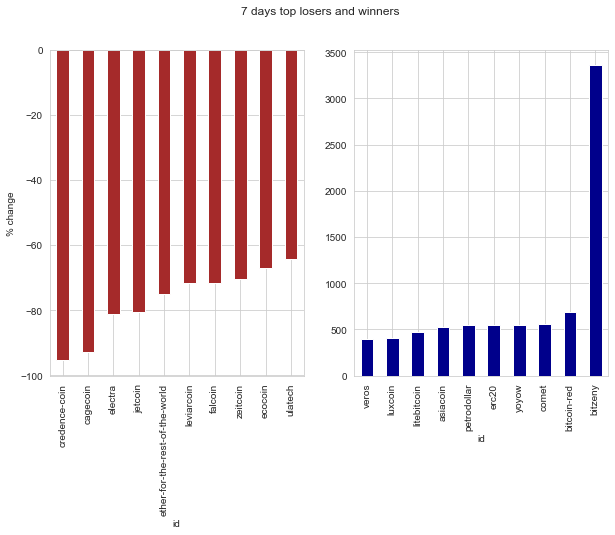

In [177]:
TITLE1 = "7 days top losers and winners"
volatility7d = volatility.sort_values('percent_change_7d')
fig, ax = top10_subplot(volatility7d.percent_change_7d, TITLE1)


In [181]:
largecap = cap.query('market_cap_usd > 1E+10')

In [182]:
largecap

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


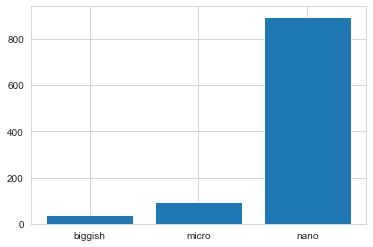

In [185]:
def capcount(query_string):
    return cap.query(query_string).count().id
LABELS = ["biggish", "micro", "nano"]
biggish = capcount("market_cap_usd > 3E+8")
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")
nano =  capcount("market_cap_usd < 5E+7")
values = [biggish, micro, nano]
plt.bar(range(len(values)), values, tick_label=LABELS);
